<a href="https://colab.research.google.com/github/anacarolcarrascoconsultorias-lab/IBM-Data-Science-Assignments/blob/main/Lab_19_Scatter_Plot_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




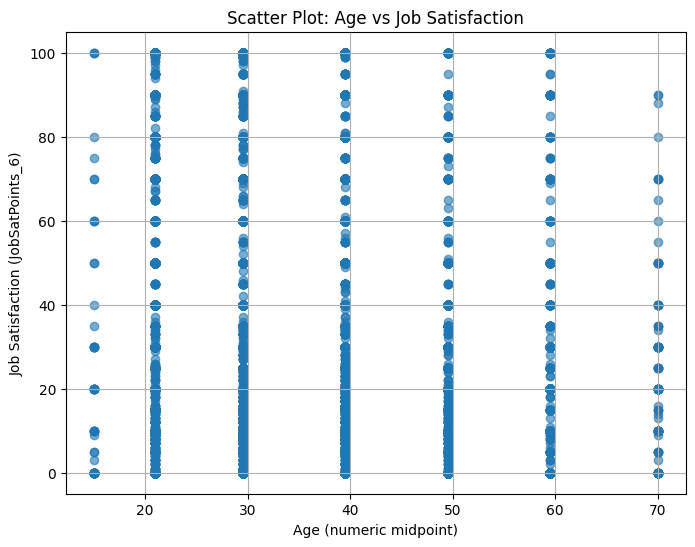

In [4]:
## Write your code here
# --- Clean AGE (convert buckets to numeric midpoints) ---

age_mapping = {
    "Under 18 years old": 15,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}

age_sat = df[['Age', 'JobSatPoints_6']].copy()

# Map the age categories to numeric values
age_sat['Age'] = age_sat['Age'].map(age_mapping)

# Convert Job Satisfaction to numeric
age_sat['JobSatPoints_6'] = pd.to_numeric(age_sat['JobSatPoints_6'], errors='coerce')

# Drop rows where conversion failed
age_sat = age_sat.dropna(subset=['Age', 'JobSatPoints_6'])

# --- Plot ---
plt.figure(figsize=(8, 6))
plt.scatter(age_sat['Age'], age_sat['JobSatPoints_6'], alpha=0.6)

plt.xlabel('Age (numeric midpoint)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.title('Scatter Plot: Age vs Job Satisfaction')
plt.grid(True)
plt.show()


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


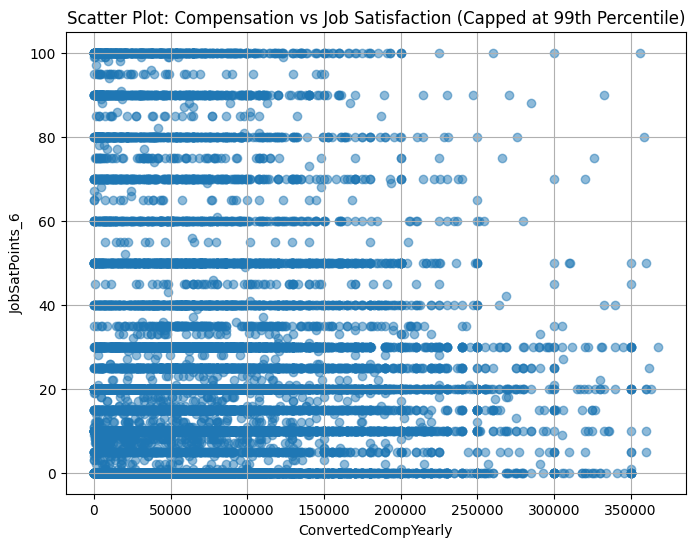

In [6]:
comp_sat = df[['ConvertedCompYearly', 'JobSatPoints_6']].copy()

# Convert to numeric
comp_sat['ConvertedCompYearly'] = pd.to_numeric(comp_sat['ConvertedCompYearly'], errors='coerce')
comp_sat['JobSatPoints_6'] = pd.to_numeric(comp_sat['JobSatPoints_6'], errors='coerce')

# Drop NaN rows
comp_sat = comp_sat.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# --- Cap extreme compensation values using the 99th percentile ---
upper_cap = comp_sat['ConvertedCompYearly'].quantile(0.99)
comp_sat = comp_sat[comp_sat['ConvertedCompYearly'] <= upper_cap]

# --- Plot ---
plt.figure(figsize=(8, 6))
plt.scatter(comp_sat['ConvertedCompYearly'], comp_sat['JobSatPoints_6'], alpha=0.5)

plt.xlabel('ConvertedCompYearly')
plt.ylabel('JobSatPoints_6')
plt.title('Scatter Plot: Compensation vs Job Satisfaction (Capped at 99th Percentile)')
plt.grid(True)
plt.show()


### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


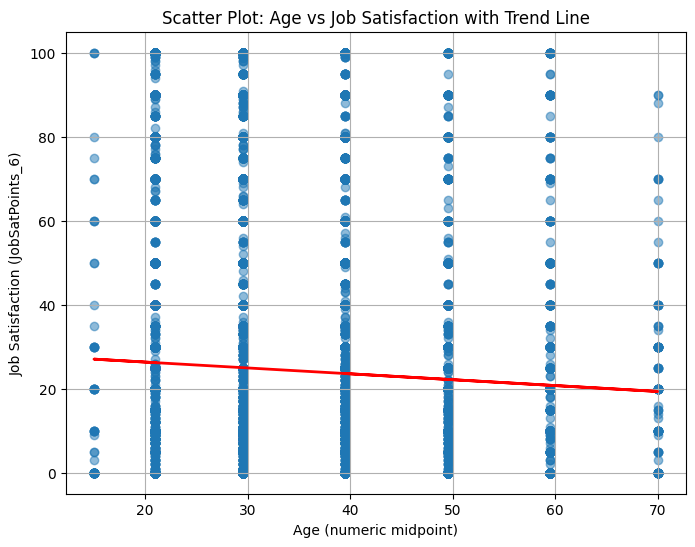

In [7]:
## Write your code here
import numpy as np

# Reuse age_sat from Task 1
x = age_sat['Age']
y = age_sat['JobSatPoints_6']

# --- Fit a simple linear regression (1st-degree polynomial) ---
m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(x, y, alpha=0.5)

# Regression line
plt.plot(x, m*x + b, color='red', linewidth=2)

plt.xlabel('Age (numeric midpoint)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.title('Scatter Plot: Age vs Job Satisfaction with Trend Line')
plt.grid(True)
plt.show()


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


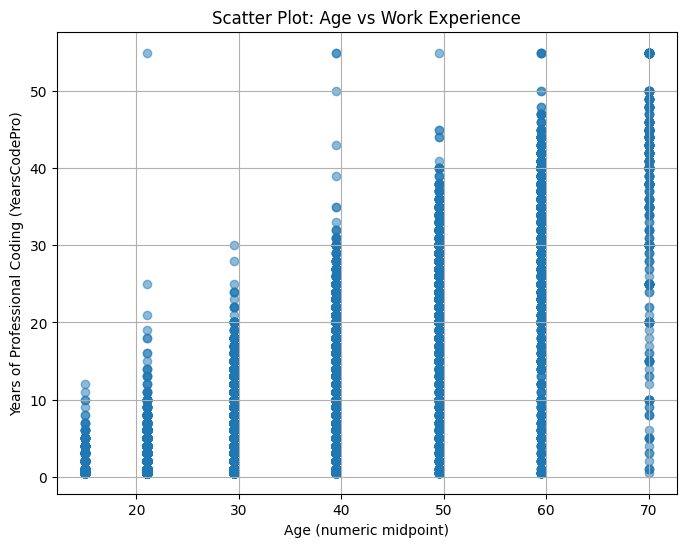

In [8]:
## Write your code here
# --- Clean YearsCodePro ---

def convert_years(val):
    if pd.isna(val):
        return np.nan
    if val == "Less than 1 year":
        return 0.5
    if val == "More than 50 years":
        return 55
    # Otherwise, convert normally
    try:
        return float(val)
    except:
        return np.nan

work_exp = df[['Age', 'YearsCodePro']].copy()

# Convert Age again using the mapping from earlier
work_exp['Age'] = work_exp['Age'].map({
    "Under 18 years old": 15,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
})

# Apply conversion to YearsCodePro
work_exp['YearsCodePro'] = work_exp['YearsCodePro'].apply(convert_years)

# Remove missing rows
work_exp = work_exp.dropna(subset=['Age', 'YearsCodePro'])

# --- Plot ---
plt.figure(figsize=(8, 6))
plt.scatter(work_exp['Age'], work_exp['YearsCodePro'], alpha=0.5)

plt.xlabel('Age (numeric midpoint)')
plt.ylabel('Years of Professional Coding (YearsCodePro)')
plt.title('Scatter Plot: Age vs Work Experience')
plt.grid(True)
plt.show()


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


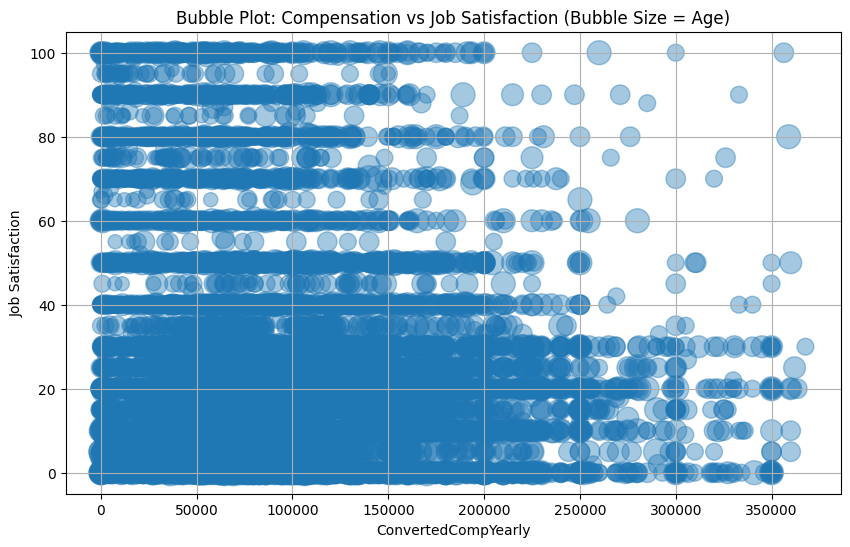

In [9]:
## Write your code here
# --- Bubble Plot: Compensation vs Job Satisfaction, Age as bubble size ---

bubble = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Age']].copy()

# Convert columns to numeric
bubble['ConvertedCompYearly'] = pd.to_numeric(bubble['ConvertedCompYearly'], errors='coerce')
bubble['JobSatPoints_6'] = pd.to_numeric(bubble['JobSatPoints_6'], errors='coerce')

# Convert Age using same mapping
bubble['Age'] = bubble['Age'].map({
    "Under 18 years old": 15,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
})

# Drop missing values
bubble = bubble.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age'])

# Cap extreme compensation at 99th percentile again
upper_cap = bubble['ConvertedCompYearly'].quantile(0.99)
bubble = bubble[bubble['ConvertedCompYearly'] <= upper_cap]

# Scale bubble size (otherwise bubbles get huge)
size_scaled = bubble['Age'] * 5   # adjust factor if too small/big

plt.figure(figsize=(10, 6))
plt.scatter(
    bubble['ConvertedCompYearly'],
    bubble['JobSatPoints_6'],
    s=size_scaled,
    alpha=0.4
)

plt.xlabel("ConvertedCompYearly")
plt.ylabel("Job Satisfaction")
plt.title("Bubble Plot: Compensation vs Job Satisfaction (Bubble Size = Age)")
plt.grid(True)
plt.show()


#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


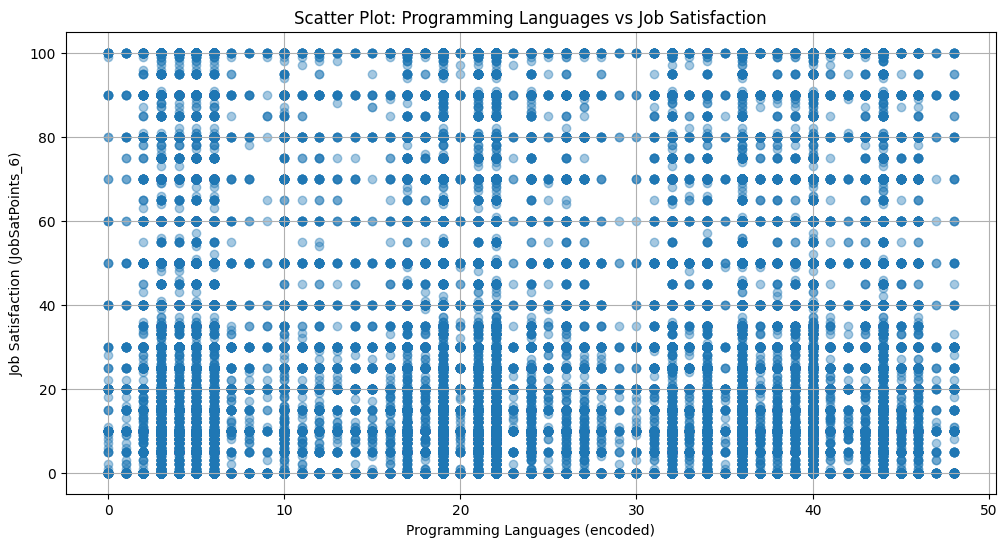

{0: 'Ada',
 1: 'Apex',
 2: 'Assembly',
 3: 'Bash/Shell (all shells)',
 4: 'C',
 5: 'C#',
 6: 'C++',
 7: 'Clojure',
 8: 'Cobol',
 9: 'Crystal',
 10: 'Dart',
 11: 'Delphi',
 12: 'Elixir',
 13: 'Erlang',
 14: 'F#',
 15: 'Fortran',
 16: 'GDScript',
 17: 'Go',
 18: 'Groovy',
 19: 'HTML/CSS',
 20: 'Haskell',
 21: 'Java',
 22: 'JavaScript',
 23: 'Julia',
 24: 'Kotlin',
 25: 'Lisp',
 26: 'Lua',
 27: 'MATLAB',
 28: 'MicroPython',
 29: 'Nim',
 30: 'OCaml',
 31: 'Objective-C',
 32: 'PHP',
 33: 'Perl',
 34: 'PowerShell',
 35: 'Prolog',
 36: 'Python',
 37: 'R',
 38: 'Ruby',
 39: 'Rust',
 40: 'SQL',
 41: 'Scala',
 42: 'Solidity',
 43: 'Swift',
 44: 'TypeScript',
 45: 'VBA',
 46: 'Visual Basic (.Net)',
 47: 'Zephyr',
 48: 'Zig'}

In [10]:
## Write your code here
# --- Scatter: Languages vs Job Satisfaction ---

lang = df[['LanguageHaveWorkedWith', 'JobSatPoints_6']].copy()

# Drop rows where no language was provided
lang = lang.dropna(subset=['LanguageHaveWorkedWith'])

# Convert satisfaction to numeric
lang['JobSatPoints_6'] = pd.to_numeric(lang['JobSatPoints_6'], errors='coerce')
lang = lang.dropna(subset=['JobSatPoints_6'])

# Split by semicolon and explode
lang['LanguageHaveWorkedWith'] = lang['LanguageHaveWorkedWith'].str.split(';')
lang = lang.explode('LanguageHaveWorkedWith')

# Remove whitespace
lang['LanguageHaveWorkedWith'] = lang['LanguageHaveWorkedWith'].str.strip()

# Encode languages as numeric positions for scatter
lang['LangCode'] = lang['LanguageHaveWorkedWith'].astype('category').cat.codes

plt.figure(figsize=(12, 6))
plt.scatter(lang['LangCode'], lang['JobSatPoints_6'], alpha=0.4)

plt.xlabel("Programming Languages (encoded)")
plt.ylabel("Job Satisfaction (JobSatPoints_6)")
plt.title("Scatter Plot: Programming Languages vs Job Satisfaction")
plt.grid(True)
plt.show()

# Optional: show mapping
lang_mapping = dict(enumerate(lang['LanguageHaveWorkedWith'].astype('category').cat.categories))
lang_mapping


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


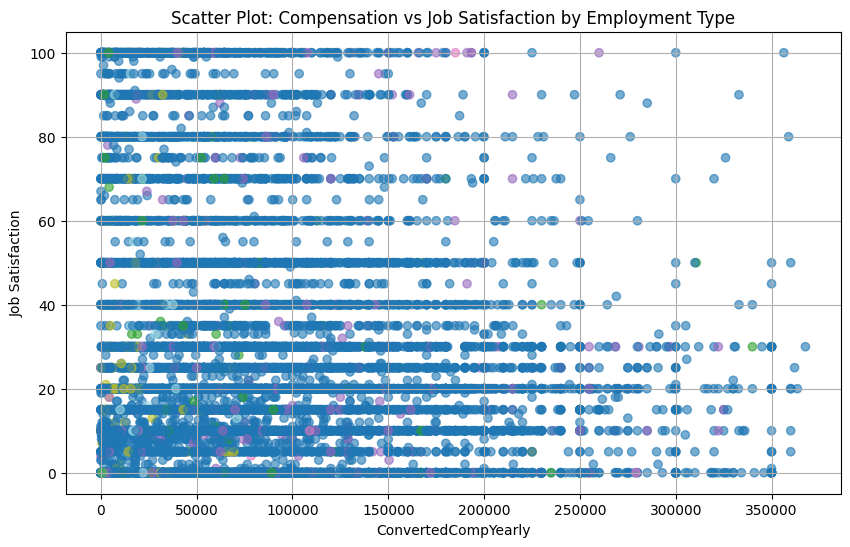

{0: 'Employed, full-time',
 1: 'Employed, part-time',
 2: 'Independent contractor, freelancer, or self-employed',
 3: 'Not employed, but looking for work',
 4: 'Student, full-time',
 5: 'Student, part-time'}

In [12]:
## Write your code here
# Clean primary employment type
emp = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']].copy()

# Convert numeric columns
emp['ConvertedCompYearly'] = pd.to_numeric(emp['ConvertedCompYearly'], errors='coerce')
emp['JobSatPoints_6'] = pd.to_numeric(emp['JobSatPoints_6'], errors='coerce')

# Drop missing
emp = emp.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment'])

# Extract primary employment type (first item)
emp['PrimaryEmployment'] = emp['Employment'].str.split(';').str[0].str.strip()

# Cap extreme compensation (same as before)
upper_cap = emp['ConvertedCompYearly'].quantile(0.99)
emp = emp[emp['ConvertedCompYearly'] <= upper_cap]

plt.figure(figsize=(10, 6))

# Encode employment type to assign colors
emp['EmpCode'] = emp['PrimaryEmployment'].astype('category').cat.codes

plt.scatter(
    emp['ConvertedCompYearly'],
    emp['JobSatPoints_6'],
    c=emp['EmpCode'],
    cmap='tab20',
    alpha=0.6
)

plt.xlabel("ConvertedCompYearly")
plt.ylabel("Job Satisfaction")
plt.title("Scatter Plot: Compensation vs Job Satisfaction by Employment Type")
plt.grid(True)
plt.show()

# Optional: show mapping of color codes to categories
dict(enumerate(emp['PrimaryEmployment'].astype('category').cat.categories))


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


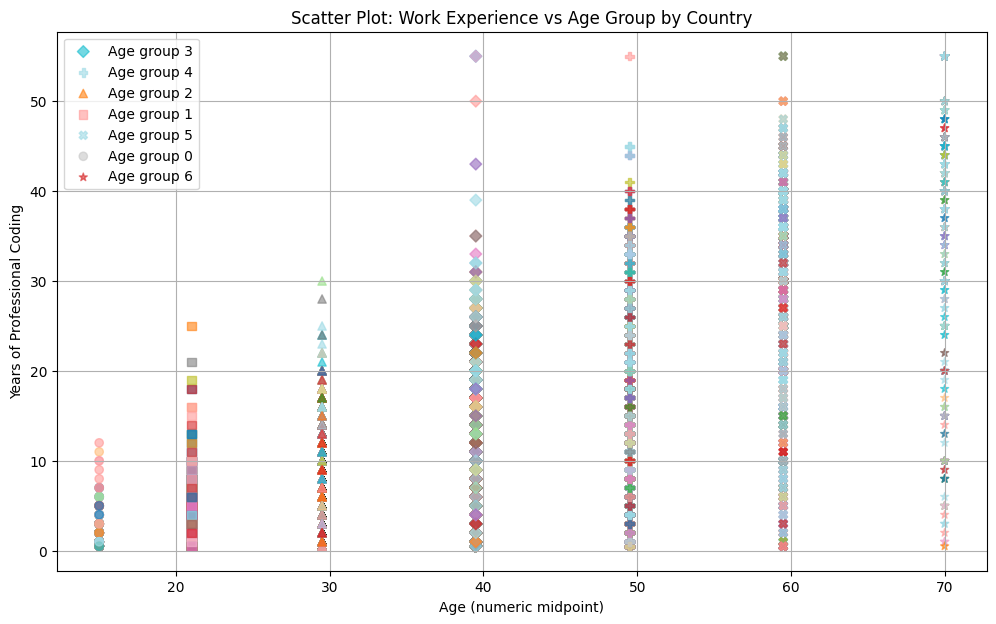

In [15]:
## Write your code here# Build clean dataset
exp_country = df[['Country', 'Age', 'YearsCodePro']].copy()

# Convert age buckets to numeric midpoint
age_map = {
    "Under 18 years old": 15,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}
exp_country['Age'] = exp_country['Age'].map(age_map)

# Convert YearsCodePro
def convert_years(val):
    if pd.isna(val):
        return np.nan
    if val == "Less than 1 year":
        return 0.5
    if val == "More than 50 years":
        return 55
    try:
        return float(val)
    except:
        return np.nan

exp_country['YearsCodePro'] = exp_country['YearsCodePro'].apply(convert_years)

# Drop missing
exp_country = exp_country.dropna(subset=['Country', 'Age', 'YearsCodePro'])
plt.figure(figsize=(12, 7))

# Encode country and age group
exp_country['CountryCode'] = exp_country['Country'].astype('category').cat.codes
exp_country['AgeCode'] = exp_country['Age'].astype('category').cat.codes

markers = ['o', 's', '^', 'D', 'P', 'X', '*']  # 7 age groups

for age_code in exp_country['AgeCode'].unique():
    subset = exp_country[exp_country['AgeCode'] == age_code]
    plt.scatter(
        subset['Age'],
        subset['YearsCodePro'],
        c=subset['CountryCode'],
        cmap='tab20',
        alpha=0.6,
        marker=markers[age_code % len(markers)],
        label=f"Age group {age_code}"
    )

plt.xlabel("Age (numeric midpoint)")
plt.ylabel("Years of Professional Coding")
plt.title("Scatter Plot: Work Experience vs Age Group by Country")
plt.grid(True)
plt.legend()
plt.show()


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


#PERSONAL INSIGHTS

##**Summary & Interpretation**

In this lab, I explored relationships between key survey variables using various types of scatter plots, focusing on how compensation, job satisfaction, age, work experience, and professional characteristics interact across the developer community.

First, by converting categorical age ranges and work-experience strings into numeric values, I ensured the dataset could be visualized properly. The scatter plot of Age vs Job Satisfaction showed that satisfaction is widely distributed across all age groups, with only a slight downward trend as age increases.

The Compensation vs Job Satisfaction scatter initially contained extreme outliers, which required capping at the 99th percentile; once cleaned, the plot revealed that higher salaries do not consistently correspond to higher satisfaction, indicating that compensation alone does not drive job fulfillment.

The bubble plot added age as a third dimension and reinforced this pattern by showing similar satisfaction levels across bubble sizes. When exploding multi-select fields, such as programming languages, each language displayed broad variation in job satisfaction, suggesting that technologies developers work with do not strongly predict happiness on their own.

Grouped scatter plots provided further insights: visualizing compensation by employment type showed overlapping satisfaction ranges across categories, highlighting that employment status alone does not determine satisfaction. Finally, comparing work experience and age across countries illustrated expected trends (older developers generally have more experience) while also revealing differences across countries and age groups.

Together, these scatter-based visualizations demonstrate how multivariate relationships in the dataset can uncover patterns, challenge assumptions, and enrich understanding of developer demographics and work experiences.

### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
